In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


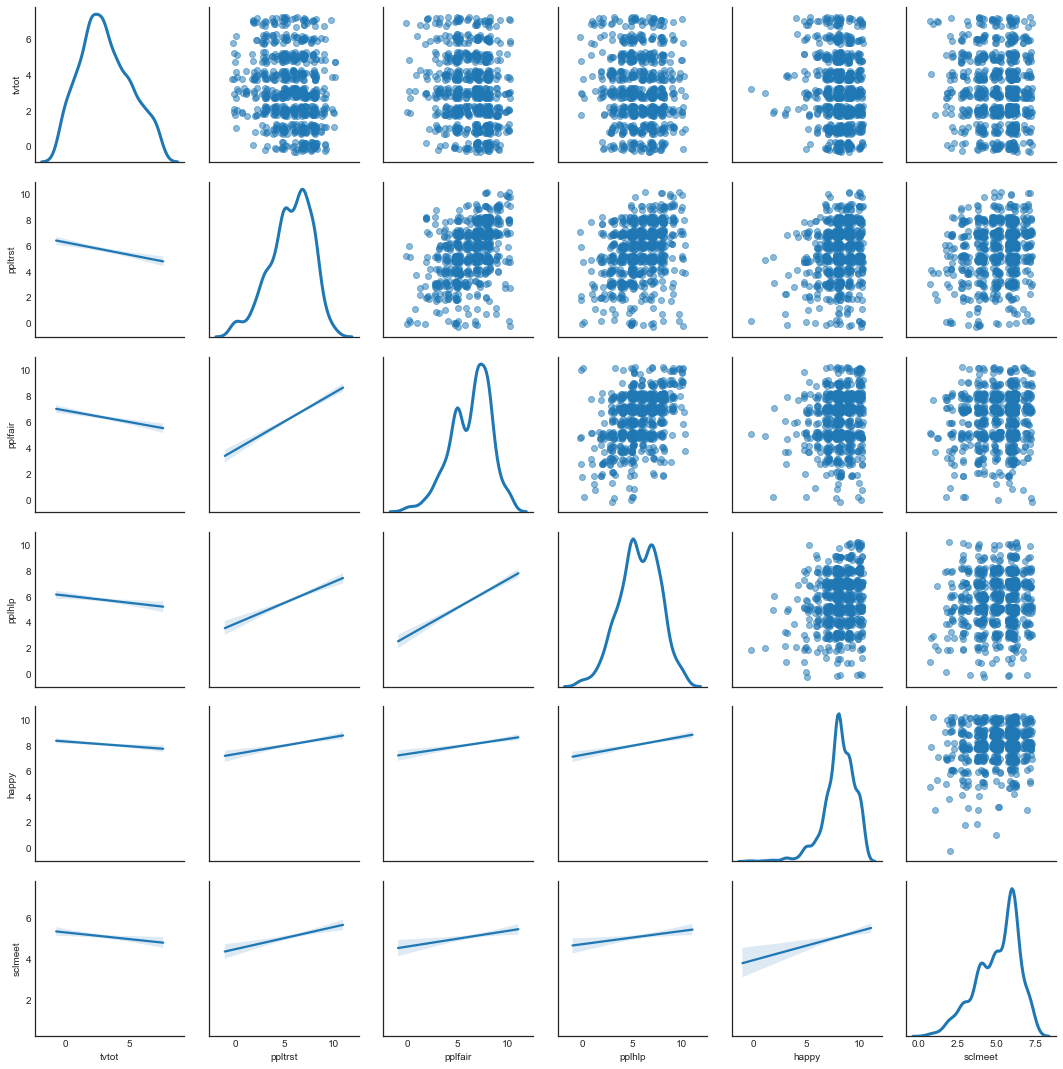

In [2]:
sns.set_style('white')
ess = pd.read_csv('../Datasets/ESSdata_Thinkful.csv')

ess_czch = ess.loc[
    ((ess['cntry'] == 'CZ') | (ess['cntry'] == 'CH')) & (ess['year'] == 6),
    ['cntry', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet']
]

# variables can only take integer values between 0 and 10, points
# on the scatterplot will hide one another. To see all the points, we
# create a dataframe of random noise or jitter and add it only when plotting

ess_jittered = ess_czch.loc[:, 'tvtot':'sclmeet'].dropna()
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(ess_jittered.shape)),
    columns=ess_jittered.columns
)

#combine data and noise
ess_jittered = ess_jittered.add(jitter)

#declare scatterplot matrix
g = sns.PairGrid(ess_jittered.dropna(), diag_sharey=False)
#scatterplot
g.map_upper(plt.scatter, alpha=.5)
#fit line summarizing linear relationship of two variables
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
#give info about univariate distribution of variables
g.map_diag(sns.kdeplot, lw=3)
plt.show()

            tvtot   ppltrst   pplfair    pplhlp     happy   sclmeet
tvtot    1.000000 -0.240432 -0.233280 -0.176517 -0.265293 -0.144105
ppltrst -0.240432  1.000000  0.605589  0.500378  0.297432  0.148949
pplfair -0.233280  0.605589  1.000000  0.532927  0.275204  0.105886
pplhlp  -0.176517  0.500378  0.532927  1.000000  0.269627  0.109383
happy   -0.265293  0.297432  0.275204  0.269627  1.000000  0.244289
sclmeet -0.144105  0.148949  0.105886  0.109383  0.244289  1.000000


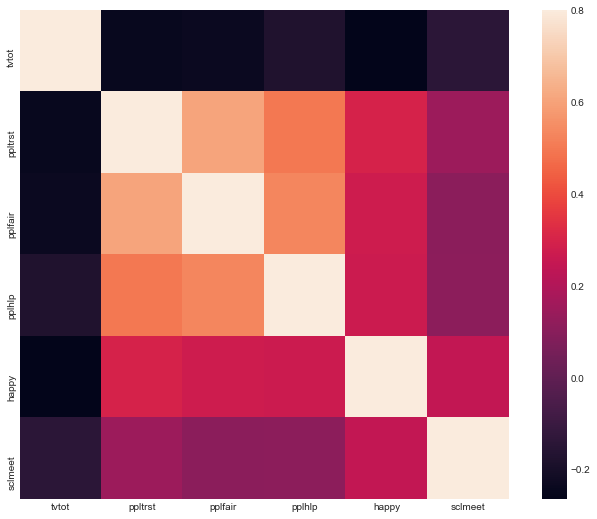

In [3]:
#make correlation matrix
corrmat = ess_czch.corr()
print(corrmat)

#setup matplotlib fig
f, ax = plt.subplots(figsize=(12, 9))

#draw heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
#heatmaps used for quick visual read on big correlation matrix

#match correlation numbers to scatterplots to get sense of 
#magnitude of correlation can look like

In [4]:
# continuous and categorical pair

c:\users\madga\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


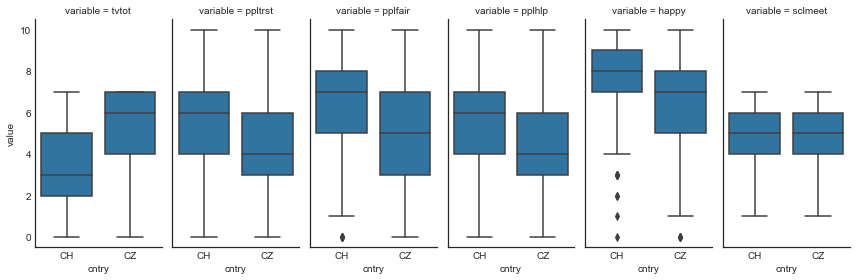

       happy                                               pplfair            \
       count      mean       std  min  25%  50%  75%   max   count      mean   
cntry                                                                          
CH     770.0  8.088312  1.437920  0.0  7.0  8.0  9.0  10.0   770.0  6.350649   
CZ     646.0  6.770898  2.053582  0.0  5.0  7.0  8.0  10.0   649.0  4.959938   

      ...  sclmeet       tvtot                                               
      ...      75%  max  count      mean       std  min  25%  50%  75%  max  
cntry ...                                                                    
CH    ...      6.0  7.0  772.0  3.141192  1.913706  0.0  2.0  3.0  5.0  7.0  
CZ    ...      6.0  7.0  653.0  5.142420  1.851775  0.0  4.0  6.0  7.0  7.0  

[2 rows x 48 columns]
tvtot
Ttest_indResult(statistic=19.962218108197227, pvalue=2.3215763985820789e-78)
ppltrst
Ttest_indResult(statistic=-10.928900558029875, pvalue=9.3940290175498276e-27)
pplfair
Ttest_ind

In [5]:
#plot all variables with boxplots for each country

#change data to use FacetGride rather than boxplot for each variable separately
ess_long = ess_czch
ess_long = pd.melt(ess_long, id_vars=['cntry'])

g = sns.FacetGrid(ess_long, col='variable', size=4, aspect=.5)
g = g.map(sns.boxplot, 'cntry', 'value')
plt.show()

#descriptive stats by group
print(ess_czch.groupby('cntry').describe())

#test if group diff are significant
for col in ess_czch.loc[:, 'tvtot':'sclmeet'].columns:
    print(col)
    print(stats.ttest_ind(
        ess_czch[ess_czch['cntry'] == 'CZ'][col].dropna(),
        ess_czch[ess_czch['cntry'] == 'CH'][col].dropna()
    ))

In [6]:
#Happy variable has potential outliers for Switzerland we should keep eye on
#Two countries appear to differ significantly for all the variables measured

In [7]:
# two categorical variables

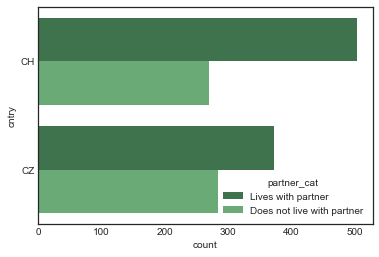

partner_cat  Does not live with partner  Lives with partner
cntry                                                      
CH                                  270                 503
CZ                                  284                 372
Power_divergenceResult(statistic=96.399580125962217, pvalue=9.2365935866454386e-21)


In [8]:
#add second categorial variable
ess_2cat = ess.loc[
    ((ess['cntry'] == 'CZ') | (ess['cntry'] == 'CH')) & (ess['year'] == 6),
    ['cntry', 'partner']
]

#create text variable so output is easier to interpret
ess_2cat['partner_cat'] = None
ess_2cat.loc[ess_2cat['partner'] == 1, 'partner_cat'] = 'Lives with partner'
ess_2cat.loc[ess_2cat['partner'] == 2, 'partner_cat'] = 'Does not live with partner'

#plot counts for each combo of levels
sns.countplot(y='cntry', hue='partner_cat', data=ess_2cat, palette='Greens_d')
plt.show()

#table of counts
counttable = pd.crosstab(ess_2cat['cntry'], ess_2cat['partner_cat'])
print(counttable)

# test returns chi-square test stat and p-value. like t-test,
#chi square is compared against distribution (chi square distribution)
# to determine whether group size differences are large enough
# to reflect differences in population
print(stats.chisquare(counttable, axis=None))